In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
import netCDF4 as nc

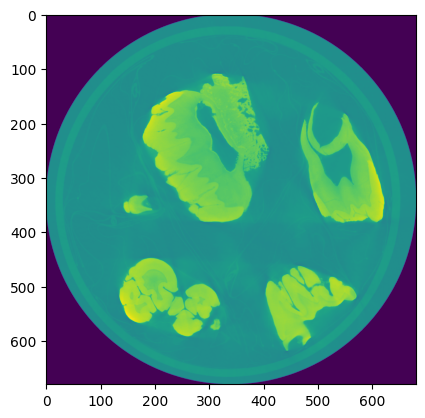

In [239]:
path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomoLoRes_SS.nc"

tomoAvg = nc.Dataset(path2mangofile)
plt.imshow(tomoAvg['tomo'][99].data)

In [241]:
tomoAvg['tomo'][99].data[100:,100:]

array([[ 9962,  9963,  9990, ...,     0,     0,     0],
       [10015,  9975,  9976, ...,     0,     0,     0],
       [10004, 10032,  9993, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int16)

In [94]:
from scipy import ndimage

In [99]:
im = tomoAvg['tomo'][99].data.astype(np.uint16)

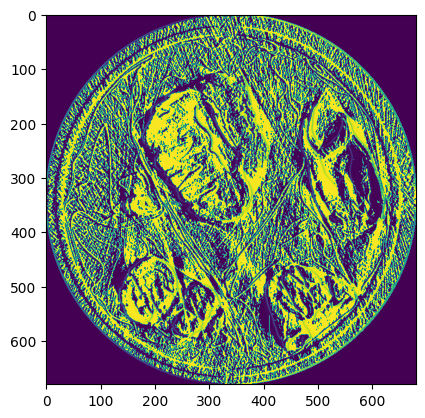

In [193]:
plt.imshow(ndimage.sobel(im,axis=1))

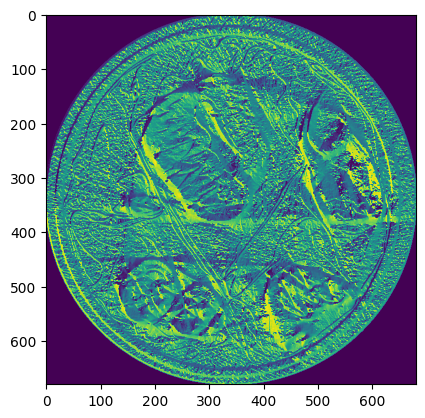

In [227]:
Gtheta = np.mod(np.arctan2(ndimage.sobel(im.astype(float),axis=0),ndimage.sobel(im.astype(float),axis=1)), 2*np.pi)

edges = np.hypot(ndimage.sobel(im.astype(float),axis=0),ndimage.sobel(im.astype(float),axis=1))
# plt.imshow(Gtheta,cmap='grey',vmin=0,vmax=2*np.pi)

plt.imshow(Gtheta)

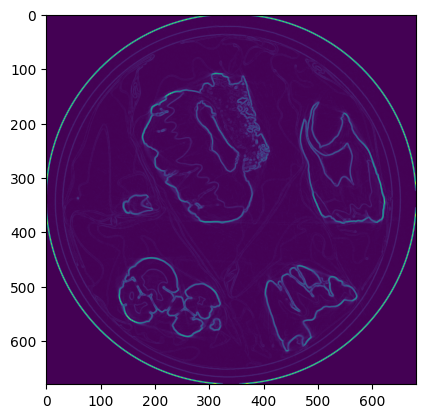

In [228]:
plt.imshow(edges)

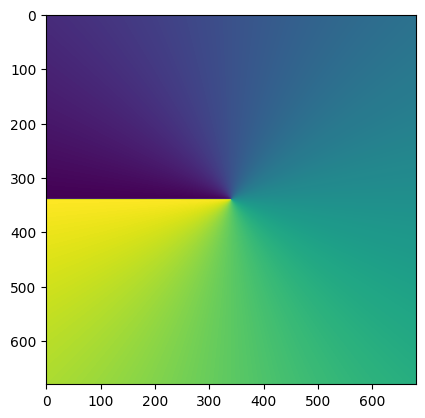

In [310]:
xmask = np.arange(-im.shape[0]/2,im.shape[0]/2)[:,None]
ymask = np.arange(-im.shape[1]/2,im.shape[1]/2)[None,:]

mask = (np.arctan2(xmask,ymask))

plt.imshow(mask)

In [327]:
def getEdges(im,thresoldDeg=5):
    xmask = np.arange(-im.shape[0]/2,im.shape[0]/2)[:,None]
    ymask = np.arange(-im.shape[1]/2,im.shape[1]/2)[None,:]

    mask = (np.arctan2(xmask,ymask))

    Gtheta = np.mod(np.arctan2(ndimage.sobel(im.astype(float),axis=0),ndimage.sobel(im.astype(float),axis=1)), 2*np.pi)
    edges = np.hypot(ndimage.sobel(im.astype(float),axis=0),ndimage.sobel(im.astype(float),axis=1))

    tmp = np.cos(Gtheta-mask)

    edges_corr = edges * ((tmp > (np.cos(np.deg2rad(thresoldDeg)))) )
    return edges_corr

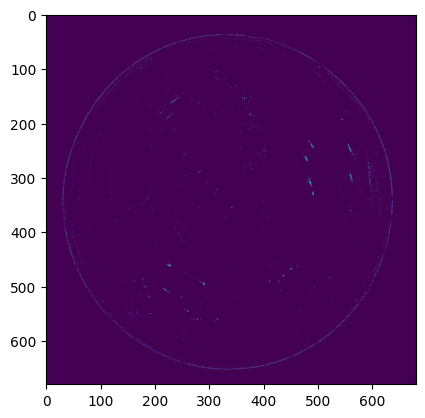

In [329]:
plt.imshow(getEdges(im))

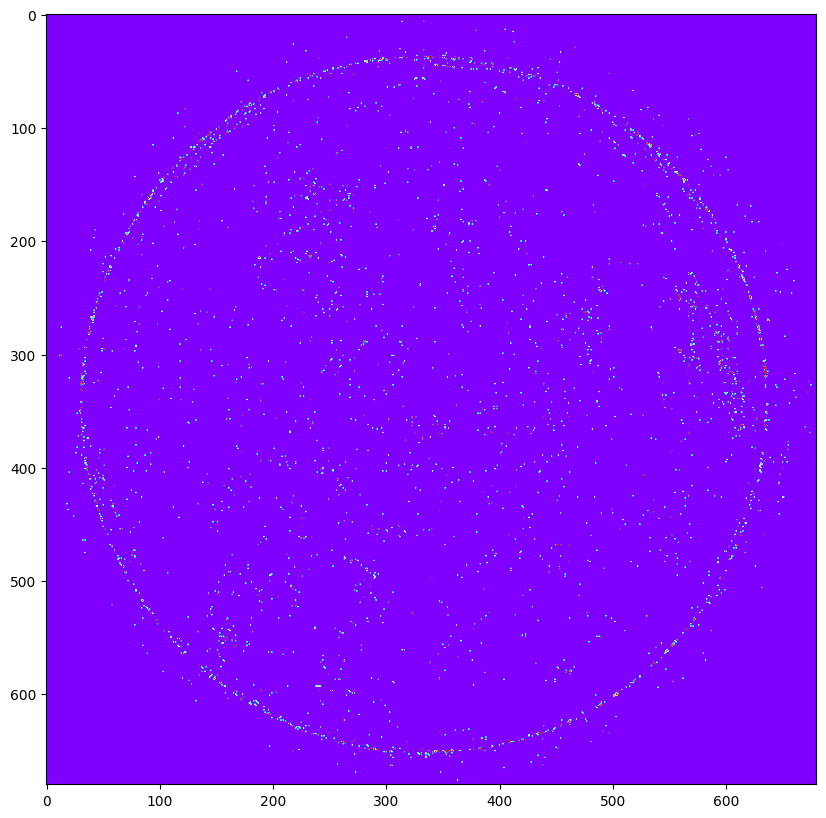

In [325]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

tmp = np.cos(Gtheta-mask)

edges_corr = edges * ((tmp > (np.cos(np.deg2rad(1)))) )

# edges_corr[edges_corr <= 70] = 0
edges_corr[edges_corr != 0] = 1

ax.axes.imshow(edges_corr,cmap='rainbow')

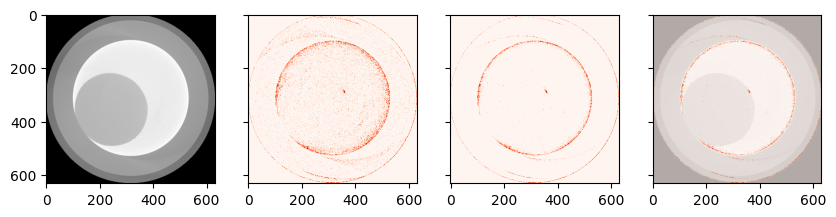

In [379]:
tomoSubSet = nc.Dataset('/home/bogdanm/data/containerSamples/Whiting_5640_5mm_031114_Xe_dec/tomoLoRes_nc/block00000000.nc')
im2 = tomoSubSet['tomo'][0].data
res = getEdges(im2)
fig,ax = plt.subplots(1,4,sharey=True,figsize=(10,3))

ax[0].axes.imshow(im2,cmap='grey')
# ax[0].axes.imshow(res,cmap='Reds')

ax[1].axes.imshow(res!=0,cmap='Reds')
res[res<(res[res!=0].mean())] = 0
ax[2].axes.imshow(res!=0,cmap='Reds')
ax[3].axes.imshow(im2,cmap='grey')
ax[3].axes.imshow(res!=0,cmap='Reds',alpha=0.7)

np.float64(1177.414978293019)

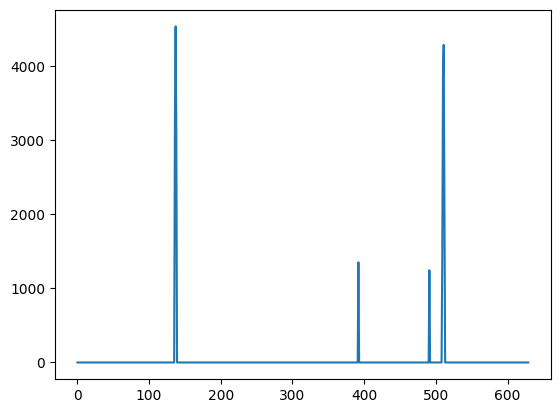

In [356]:
plt.plot(res[100])

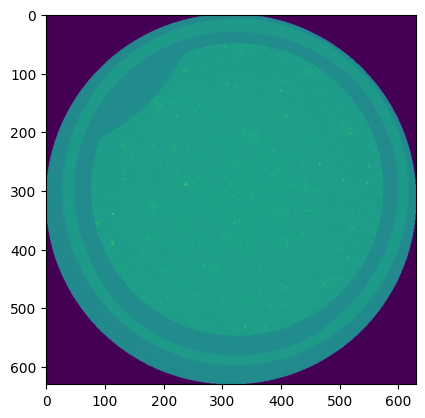

In [332]:
plt.imshow(im2)

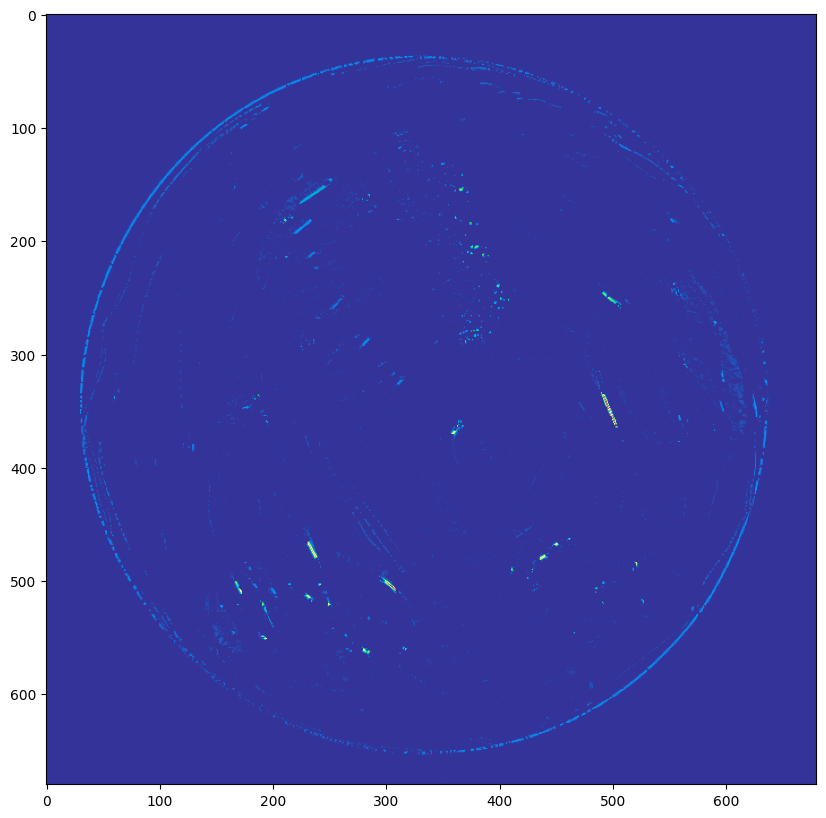

In [309]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

tmp = np.cos(Gtheta-mask)

edges_corr = edges * ((tmp > (np.cos(np.deg2rad(10)))) )

ax.axes.imshow(edges_corr,cmap='terrain')

In [279]:
tmp.min()

np.float64(-1.0)

In [276]:
np.cos(np.deg2rad(45))

np.float64(0.7071067811865476)

In [274]:
tmp

array([[-0.70710678, -0.70606462, -0.70501785, ...,  0.70396646,
         0.70501785,  0.70606462],
       [-0.70814741, -0.70710678, -0.70606154, ...,  0.70501166,
         0.70606154,  0.70710678],
       [-0.70918956, -0.70815048, -0.70710678, ...,  0.70605844,
         0.70710678,  0.70815048],
       ...,
       [-0.71023322, -0.70919571, -0.70815357, ...,  0.70710678,
         0.70815357,  0.70919571],
       [-0.70918956, -0.70815048, -0.70710678, ...,  0.70605844,
         0.70710678,  0.70815048],
       [-0.70814741, -0.70710678, -0.70606154, ...,  0.70501166,
         0.70606154,  0.70710678]])

In [270]:
(tmp > (np.cos(np.deg2rad(5)))) & (tmp < (np.cos(np.deg2rad(45))))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [249]:
mask

array([[-2.35619449, -2.35472174, -2.35324465, ..., -0.78982945,
        -0.78834801, -0.78687092],
       [-2.35766724, -2.35619449, -2.35471739, ..., -0.78835673,
        -0.78687527, -0.78539816],
       [-2.35914433, -2.35767159, -2.35619449, ..., -0.78687964,
        -0.78539816, -0.78392106],
       ...,
       [ 2.36062578,  2.35915306,  2.35767597, ...,  0.78539816,
         0.78391668,  0.78243959],
       [ 2.35914433,  2.35767159,  2.35619449, ...,  0.78687964,
         0.78539816,  0.78392106],
       [ 2.35766724,  2.35619449,  2.35471739, ...,  0.78835673,
         0.78687527,  0.78539816]])

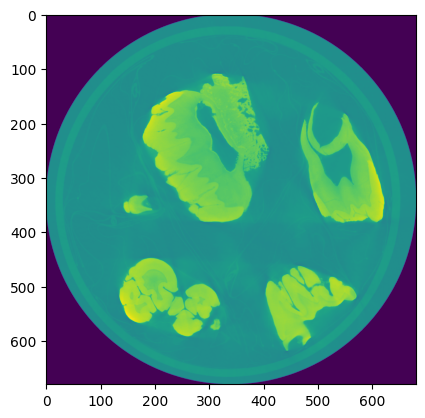

In [234]:
plt.imshow(im)

In [191]:
out > 0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

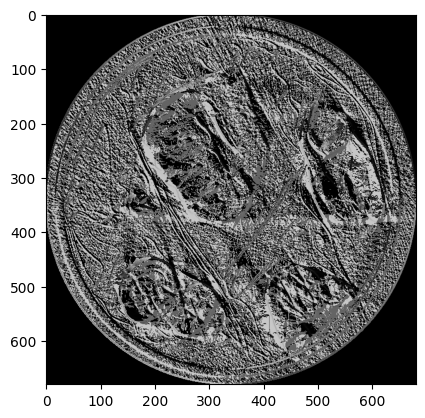

In [161]:
xmask = np.arange(-im.shape[0]/2,im.shape[0]/2)[:,None]
ymask = np.arange(-im.shape[1]/2,im.shape[1]/2)[None,:]

mask = np.arctan2(xmask,ymask)

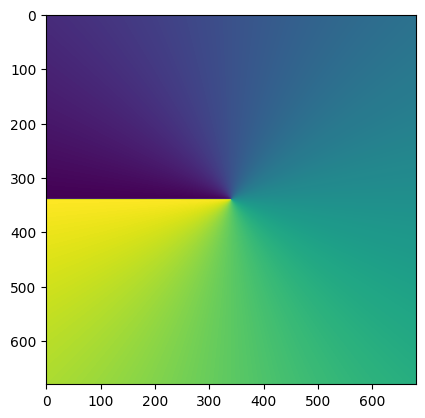

In [173]:
np.rad2deg(mask)

array([[-135.        , -134.91561747, -134.83098639, ...,  -45.25389396,
         -45.16901361,  -45.08438253],
       [-135.08438253, -135.        , -134.91536819, ...,  -45.16951365,
         -45.08463181,  -45.        ],
       [-135.16901361, -135.08463181, -135.        , ...,  -45.08488257,
         -45.        ,  -44.91536819],
       ...,
       [ 135.25389396,  135.16951365,  135.08488257, ...,   45.        ,
          44.91511743,   44.83048635],
       [ 135.16901361,  135.08463181,  135.        , ...,   45.08488257,
          45.        ,   44.91536819],
       [ 135.08438253,  135.        ,  134.91536819, ...,   45.16951365,
          45.08463181,   45.        ]])

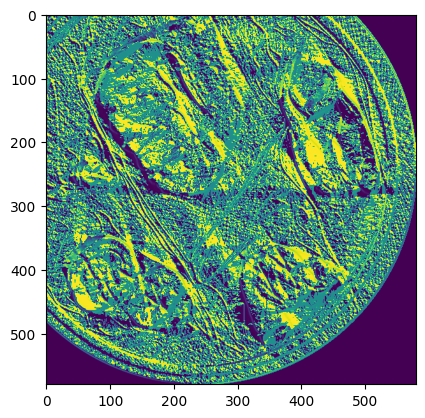

In [177]:
plt.imshow(np.rad2deg(Gtheta)[100:,100:])

In [179]:
np.rad2deg(Gtheta)[100:,100:].round(1)

array([[43.4, 89.9,  3.5, ...,  0. ,  0. ,  0. ],
       [89.9, 89.8, 89.9, ...,  0. ,  0. ,  0. ],
       [ 0. , 45. , 90. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]], dtype=float32)

In [111]:
np.arange(0,im.shape[1])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# import numpy
# import scipy
# from scipy import ndimage

# im = scipy.misc.imread('bike.jpg')
# im = im.astype('int32')
# dx = ndimage.sobel(im, 0)  # horizontal derivative
# dy = ndimage.sobel(im, 1)  # vertical derivative
# mag = numpy.hypot(dx, dy)  # magnitude
# mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)
# scipy.misc.imsave('sobel.jpg', mag)

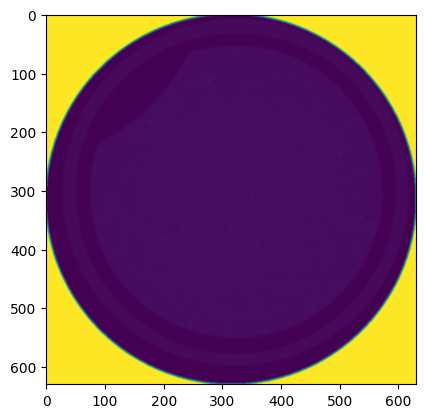

In [91]:
path2mangofile = "/home/bogdanm/data/containerSamples/Whiting_5640_5mm_031114_preserved/tomo_floatLoRes_SStomDataAvg.nc"

tomoAvg = nc.Dataset(path2mangofile)
plt.imshow(tomoAvg['tomo_float'][99].data)

In [ ]:
plt.plot(tomoAvg['tomo_float'][99].data[:,400])

In [ ]:
tomoAvg['tomo_float'][:].max()

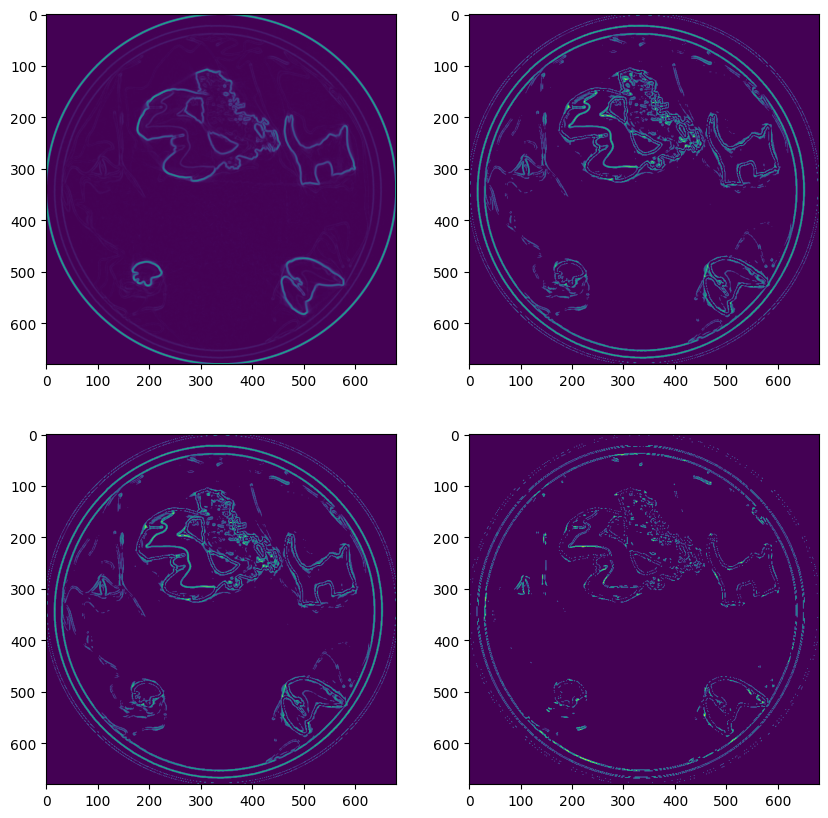

In [4]:
nslice = 60
fig,ax = plt.subplots(2,2,figsize=(10,10))

path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvg.nc"
tomoAvg = nc.Dataset(path2mangofile)
ax[0][0].axes.imshow(tomoAvg['tomo_float'][nslice].data)


path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvgFilt.nc"
tomoAvg = nc.Dataset(path2mangofile)
ax[0][1].axes.imshow(tomoAvg['tomo_float'][nslice].data)

path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvgFiltGrd.nc"
tomoAvg = nc.Dataset(path2mangofile)
ax[1][0].axes.imshow(tomoAvg['tomo_float'][nslice].data)

path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvgFiltGrdFilt.nc"
tomoAvg = nc.Dataset(path2mangofile)
ax[1][1].axes.imshow(tomoAvg['tomo_float'][nslice].data)



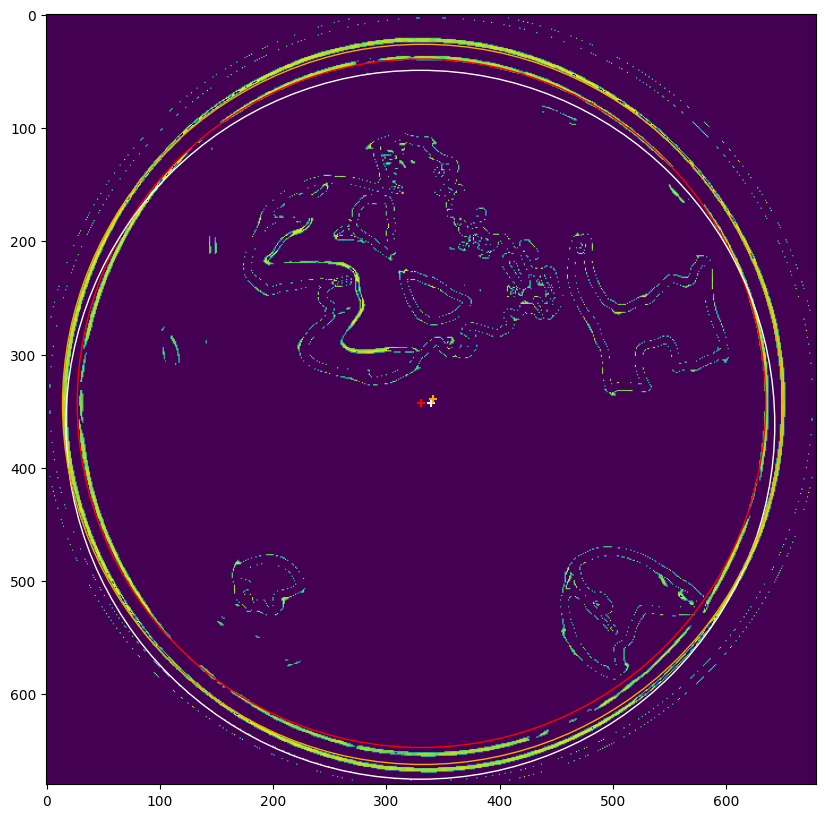

In [73]:
path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvgFiltGrdFilt.nc"
tomoProcessed = nc.Dataset(path2mangofile)
fig, ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(tomoProcessed['tomo_float'][60].data)

ax.scatter(331,343,color='r',marker='+')
ax.scatter(339,343,color='w',marker='+')
ax.scatter(341,339,color='orange',marker='+')
circ1 = plt.Circle((331,343),304,fill=False,color='r')
circ2 = plt.Circle((330,362),313,fill=False,color='w')

# Max 310 = 322:335
# Max 318 = 346:348

#  313 = 330:362

circ3 = plt.Circle((332,344),318,fill=False,color='orange')
ax.add_patch(circ1)
ax.add_patch(circ2)
ax.add_patch(circ3)

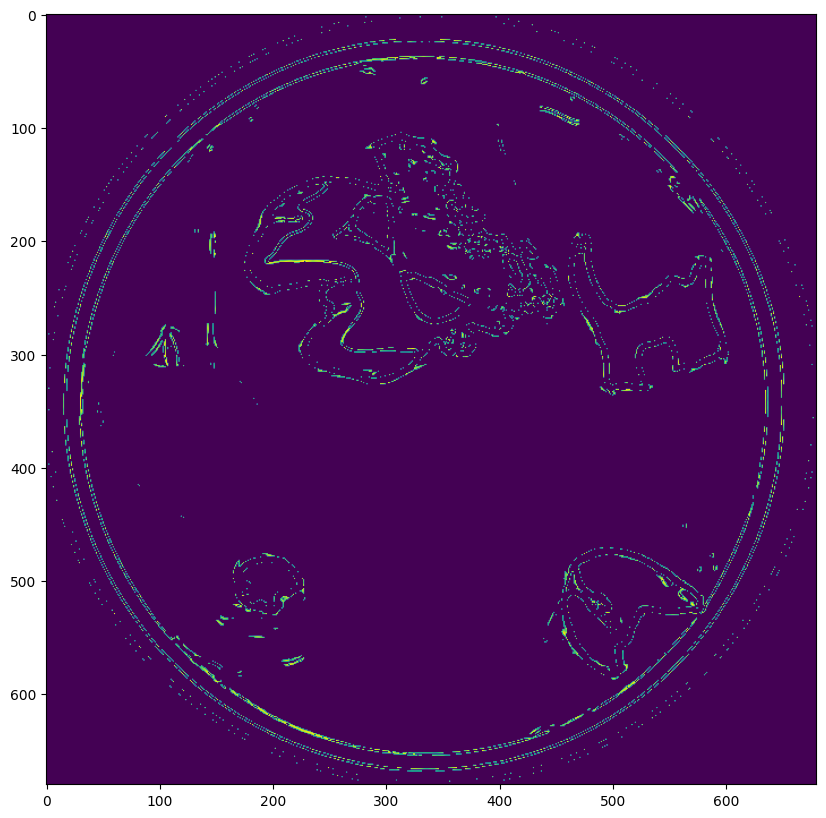

In [74]:
path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvgFiltGrdFilt.nc"
tomoProcessed = nc.Dataset(path2mangofile)
fig, ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(tomoProcessed['tomo_float'][60].data)
#3x3

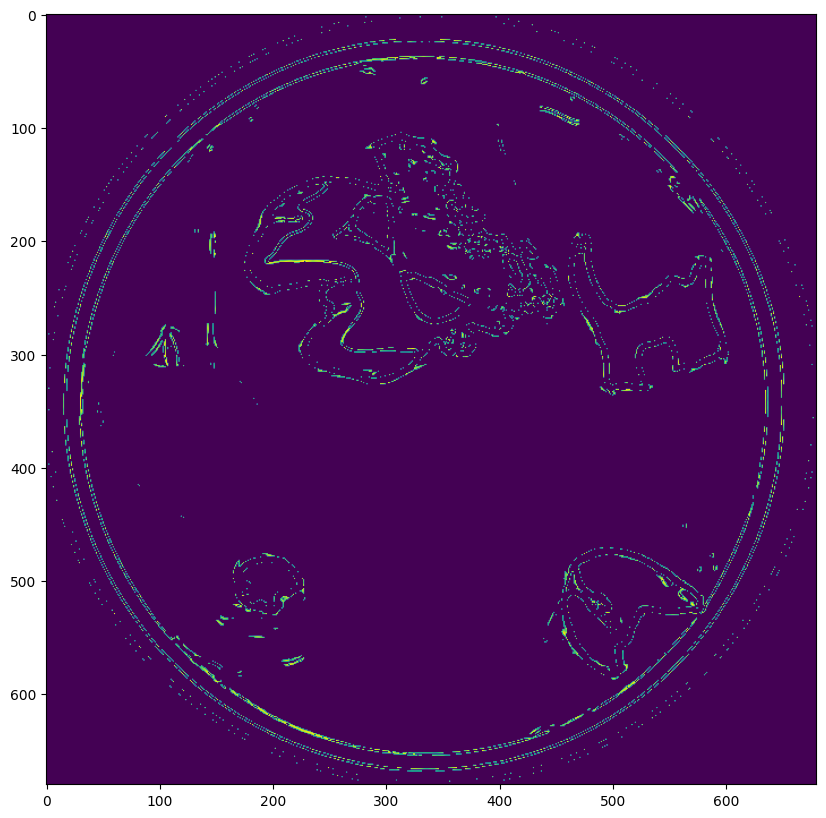

In [83]:
path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesAvgFiltGrdFilt.nc"
tomoProcessed = nc.Dataset(path2mangofile)
fig, ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(tomoProcessed['tomo_float'][60].data)

# no smoothing

In [ ]:
path2mangofile = "/home/bogdanm/data/containerSamples/RSES_Wood_PigTeeth_3rdMolars/tomo_floatLoRes_SStomDataEdgesGrdFilt.nc"
tomoProcessed = nc.Dataset(path2mangofile)
plt.imshow(tomoProcessed['tomo_float'][85].data)

In [ ]:
plt.imshow(tomoProcessed['tomo_float'][0].data - tomoProcessed['tomo_float'][85].data)

/tmp/ipykernel_2645/2058510037.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values
/tmp/ipykernel_2645/2058510037.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values
/tmp/ipykernel_2645/2058510037.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


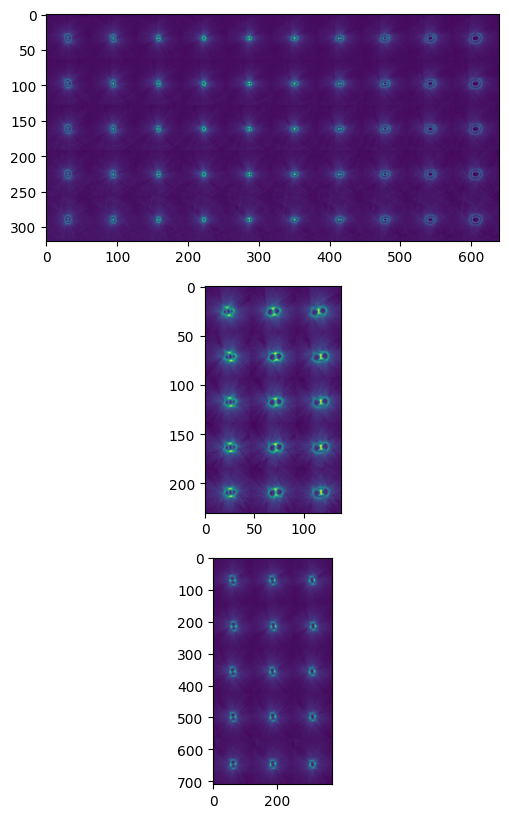

In [23]:
fig,ax = plt.subplots(3,1,figsize=(10,10))

path = "/home/bogdanm/Projects/qmango/install/bin/example.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[0].axes.imshow(arr)

path = "/home/bogdanm/Projects/qmango/install/bin/example2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[1].axes.imshow(arr)

path = "/home/bogdanm/Projects/qmango/install/bin/example3.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[2].axes.imshow(arr)


In [1]:
fig,ax = plt.subplots(3,1,figsize=(10,10))

path = "/home/bogdanm/Projects/qmango/install/bin/exampleCenterAccumulator8.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[0].axes.imshow(arr[:50].T)

path = "/home/bogdanm/Projects/qmango/install/bin/exampleCenterAccumulator4.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values
ax[1].axes.imshow(arr[:50].T)

path = "/home/bogdanm/Projects/qmango/install/bin/exampleCenterAccumulator2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values
ax[2].axes.imshow(arr[:50].T)

NameError: name 'plt' is not defined

/tmp/ipykernel_2234/3721863163.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values
/tmp/ipykernel_2234/3721863163.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


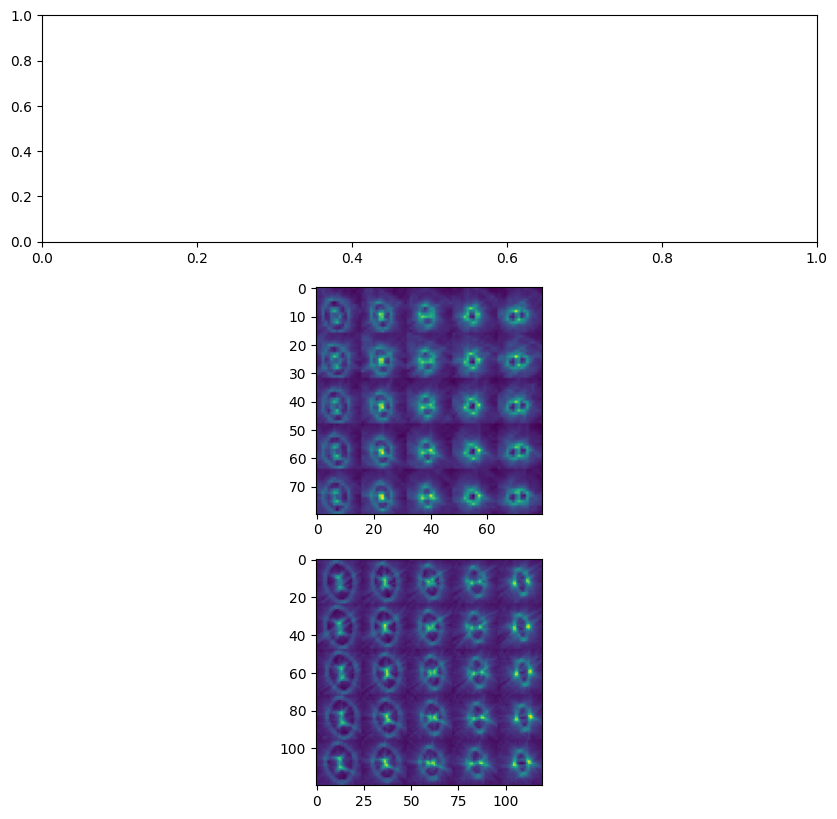

In [5]:
fig,ax = plt.subplots(3,1,figsize=(10,10))

# path = "/home/bogdanm/Projects/qmango/install/bin/example8.txt"
# arr = pd.read_csv(path,header=None,delim_whitespace=True).values

# ax[0].axes.imshow(arr)

path = "/home/bogdanm/Projects/qmango/install/bin/example4.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[1].axes.imshow(arr)

path = "/home/bogdanm/Projects/qmango/install/bin/example2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[2].axes.imshow(arr)


/tmp/ipykernel_2645/2599804958.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values
/tmp/ipykernel_2645/2599804958.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values
/tmp/ipykernel_2645/2599804958.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


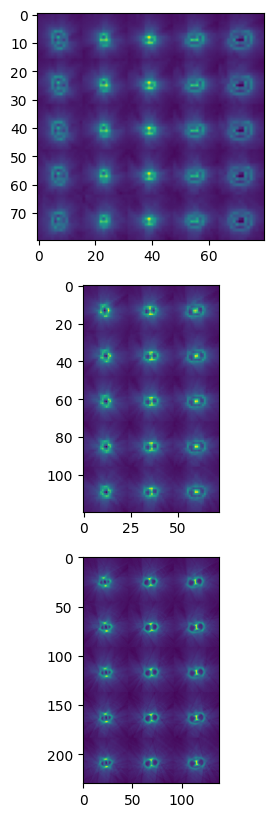

In [28]:
fig,ax = plt.subplots(3,1,figsize=(10,10))

path = "/home/bogdanm/Projects/qmango/install/bin/example8.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[0].axes.imshow(arr)

path = "/home/bogdanm/Projects/qmango/install/bin/example4.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[1].axes.imshow(arr)

path = "/home/bogdanm/Projects/qmango/install/bin/example2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

ax[2].axes.imshow(arr)


/tmp/ipykernel_2234/2959148612.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


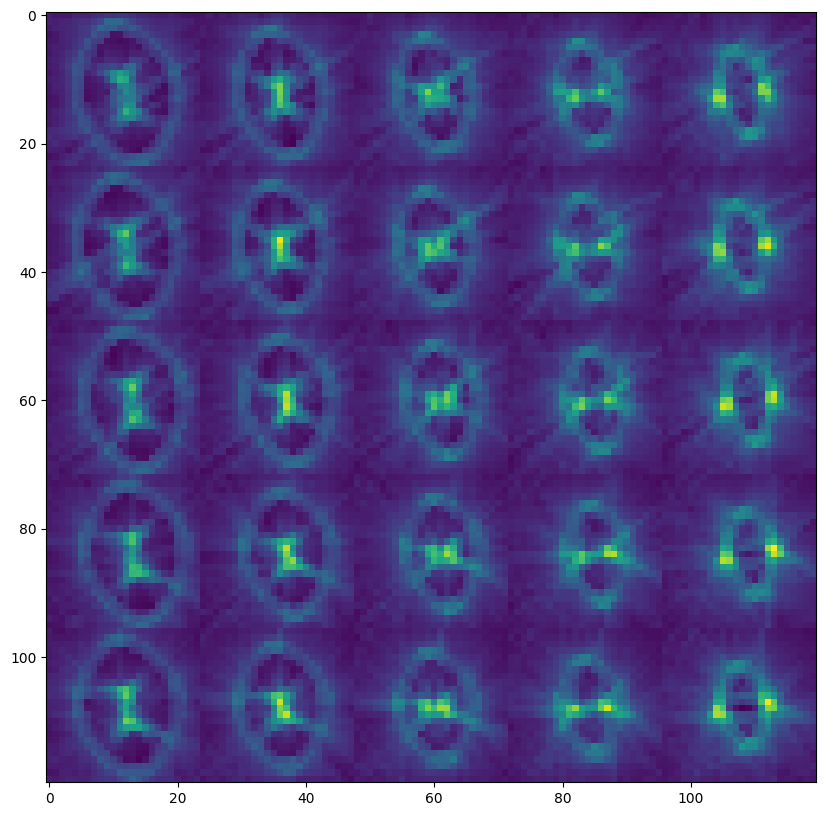

In [7]:
path = "/home/bogdanm/Projects/qmango/install/bin/example2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr)


/tmp/ipykernel_2645/1284928938.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


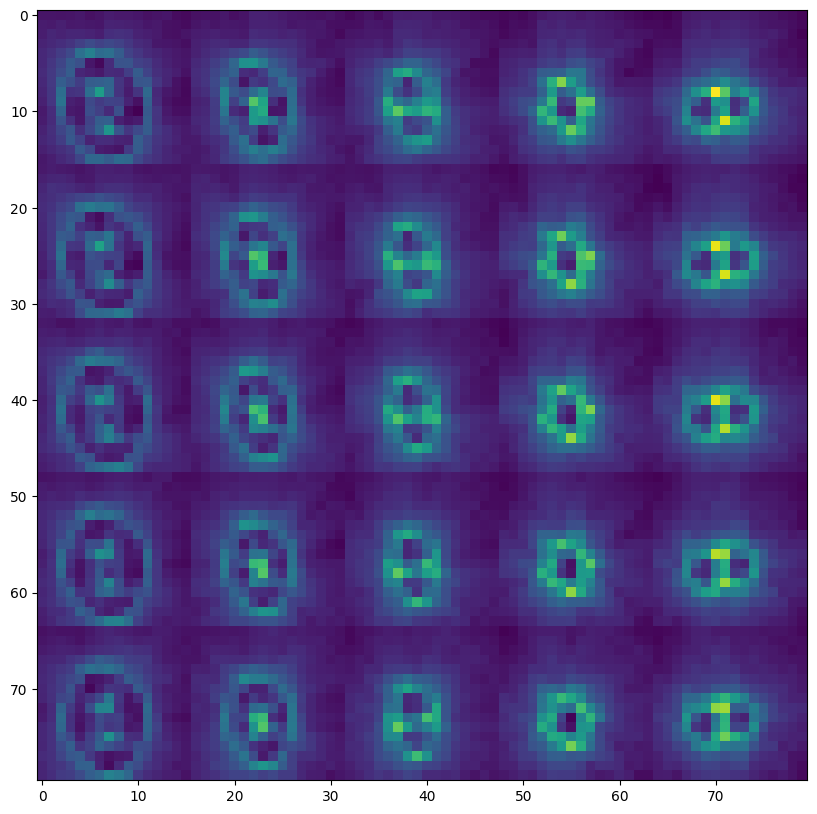

In [66]:
path = "/home/bogdanm/Projects/qmango/install/bin/example4.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr)


In [226]:
iMax = 0
jMax = 0
maxVal = 0
for i in range(1,arr.shape[0]-1):
    for j in range(1,arr.shape[1]-1):
        if arr[i,j]>maxVal:
            maxVal = (arr[i-1,j-1] + arr[i,j-1] + arr[i+1,j-1] +
                      arr[i-1,j] + arr[i,j] + arr[i+1,j] +
                      arr[i-1,j+1] + arr[i,j+1] + arr[i+1,j+1])
            iMax = i
            jMax = j


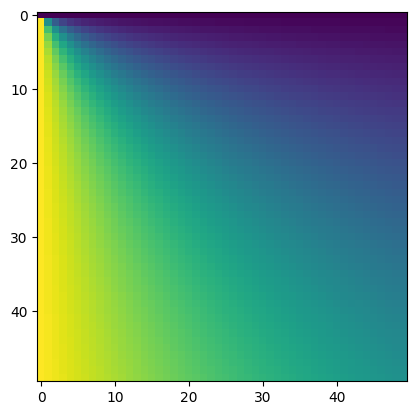

In [88]:
np.arctan2(xmask,ymask)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.57079633, 0.78539816, 0.46364761, ..., 0.02127339, 0.02083032,
        0.02040533],
       [1.57079633, 1.10714872, 0.78539816, ..., 0.04252753, 0.04164258,
        0.04079368],
       ...,
       [1.57079633, 1.54952294, 1.52826879, ..., 0.78539816, 0.77487224,
        0.76456784],
       [1.57079633, 1.54996601, 1.52915375, ..., 0.79592409, 0.78539816,
        0.77508925],
       [1.57079633, 1.550391  , 1.53000264, ..., 0.80622848, 0.79570708,
        0.78539816]])

/tmp/ipykernel_2234/2337387102.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


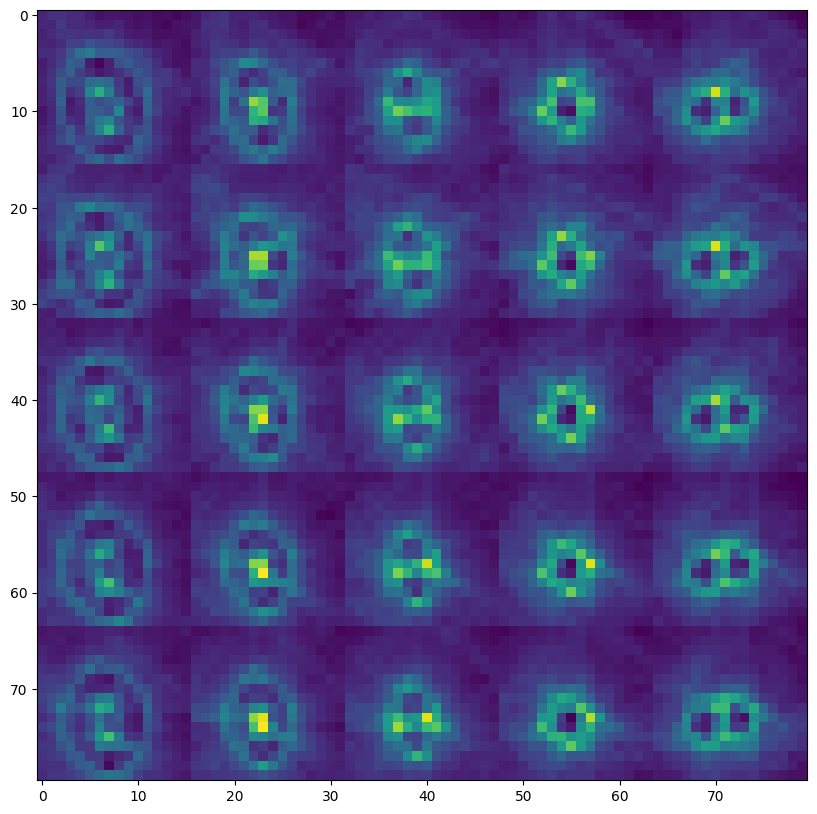

In [82]:
path = "/home/bogdanm/Projects/qmango/install/bin/example4.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr)

# maxCoords = np.unravel_index(np.argmax(arr[:(arr.shape[0]//5),:arr.shape[1]]) , arr[:(arr.shape[0]//5),:arr.shape[1]].shape)
# print(maxCoords)
# ax.scatter(maxCoords[1],maxCoords[0],marker='x',c='w')


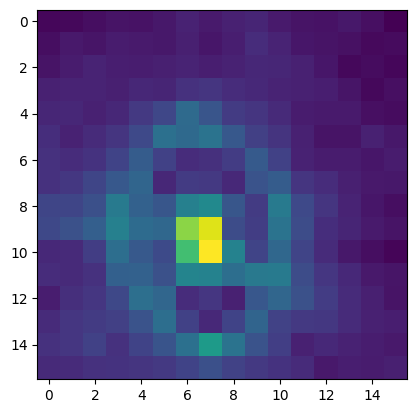

In [80]:
sample = arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[4,:,1]
plt.imshow(sample)

In [ ]:
for i in range(sample.shape[0]+1)

In [81]:
idx_max = np.unravel_index(np.argmax(sample),sample.shape)
max_zone = sample[idx_max[0]-1:idx_max[0]+2,idx_max[1]-1:idx_max[1]+2]
print(max_zone.sum())
print(max_zone)

7884
[[1153 1306  427]
 [ 992 1364  684]
 [ 694  682  582]]


7884
[[1153 1306  427]
 [ 992 1364  684]
 [ 694  682  582]]


In [52]:
max_zone = sample[idx_max[0]-1:idx_max[0]+2,idx_max[1]-1:idx_max[1]+2]
print(max_zone.sum())
print(max_zone)

6724
[[ 654  646  717]
 [ 894 1280  902]
 [ 299  681  651]]


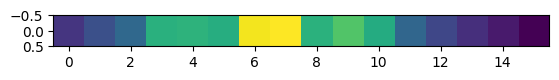

In [29]:
plt.imshow(sample.sum(axis=0)[:,None].T)

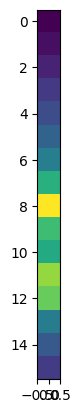

In [32]:
plt.imshow(sample.sum(axis=1)[:,None])

In [ ]:
# find max value, rotate the image relative to the max value

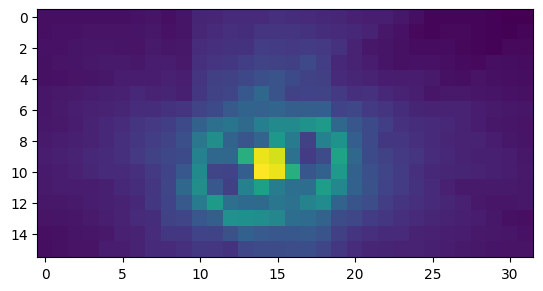

In [199]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,10,arr.shape[1]//10))[0,:,5])

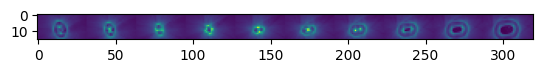

In [215]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,10,arr.shape[1]//10))[0,:,:].reshape((16,-1)))

# seems that accumulating 3x3 is the way to go

In [216]:
arr.reshape((5,arr.shape[0]//5,10,arr.shape[1]//10))[0,:,:].reshape((16,-1)).max()

np.int64(3566)

In [202]:
arr.reshape((5,arr.shape[0]//5,10,arr.shape[1]//10))[0,:,:].max(axis=(0,2))

array([2095, 2675, 2722, 2947, 3566, 3052, 3492, 1963, 1879, 1539])

In [201]:
arr.reshape((5,arr.shape[0]//5,10,arr.shape[1]//10))[0,:,:].sum(axis=(0,2))

array([270695, 287467, 294808, 298133, 303811, 302217, 301512, 295794,
       285212, 268547])

In [184]:
arr.reshape((5,arr.shape[0]//5,10,arr.shape[1]//10))[0,:,3].max()

np.int64(2947)

/tmp/ipykernel_1991067/3741932002.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


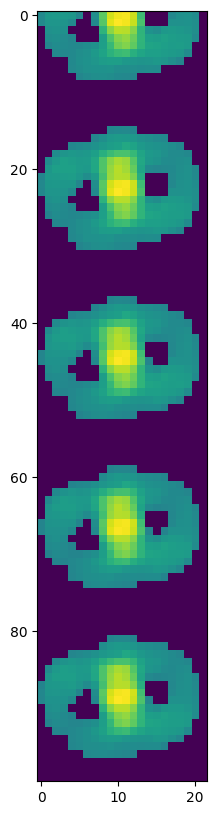

In [163]:
path = "/home/bogdanm/Projects/qmango/install/bin/exampleCenterAccumulator.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr[-100:])

/tmp/ipykernel_1991067/623098756.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


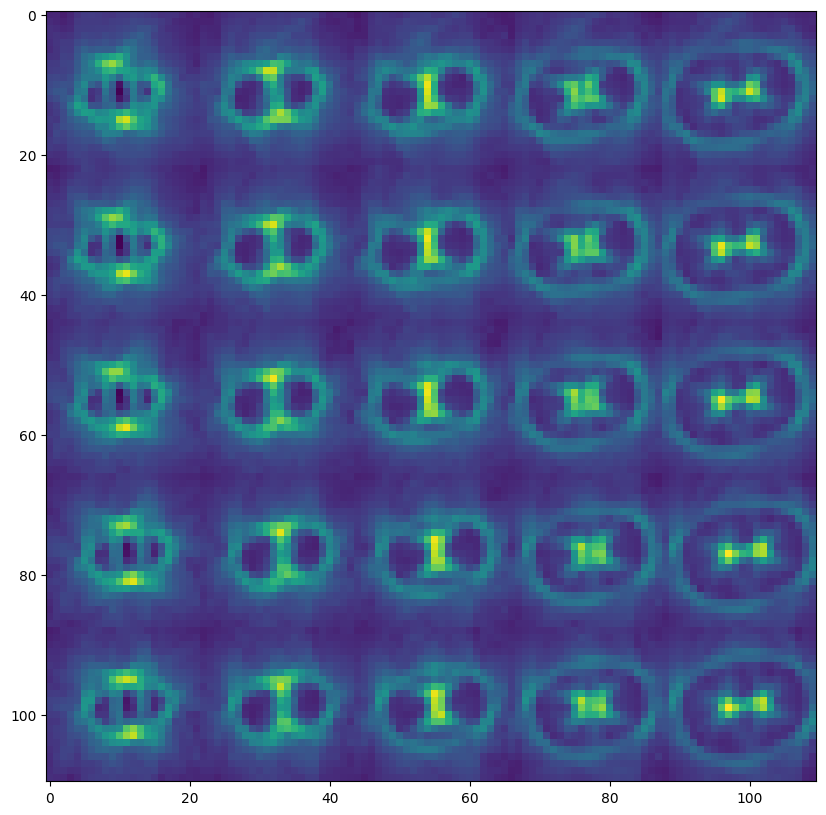

In [157]:
path = "/home/bogdanm/Projects/qmango/install/bin/example2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

# arr[arr < (np.mean(arr) + 2*np.std(arr))] = 0
fig,ax = plt.subplots(figsize=(10,10))

ax.axes.imshow(arr)

# maxCoords = np.unravel_index(np.argmax(arr[:(arr.shape[0]//5),:arr.shape[1]]) , arr[:(arr.shape[0]//5),:arr.shape[1]].shape)
# print(maxCoords)
# ax.scatter(maxCoords[1],maxCoords[0],marker='x',c='w')


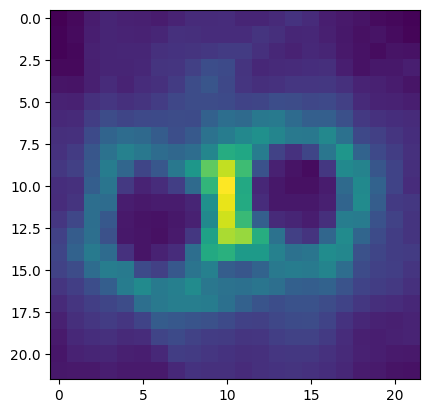

In [158]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[0,:,2])

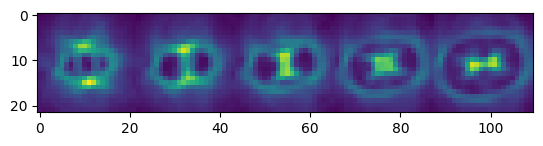

In [161]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5)).sum(axis=(0)).reshape((22,-1)))

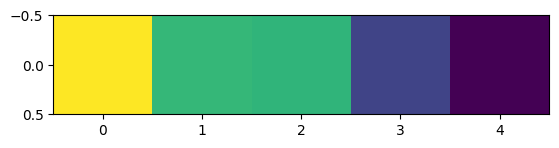

In [162]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5)).sum(axis=(0)).sum(axis=(0,2))[:,None].T)

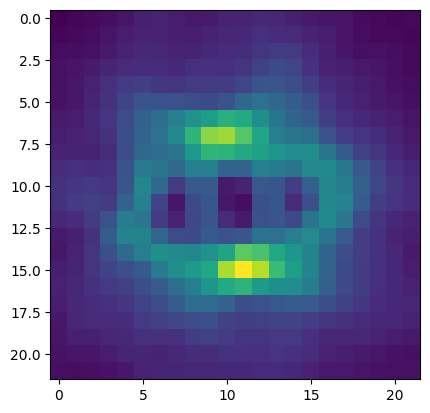

In [149]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5)).sum(axis=(0))[:,0]) # max 9783

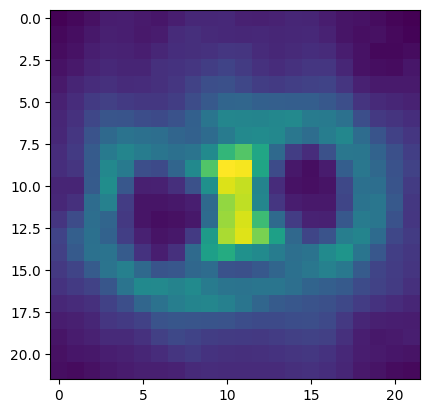

In [150]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5)).sum(axis=(0))[:,2]) # max 8874

In [139]:
arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5)).sum(axis=(0)).reshape

(22, 5, 22)

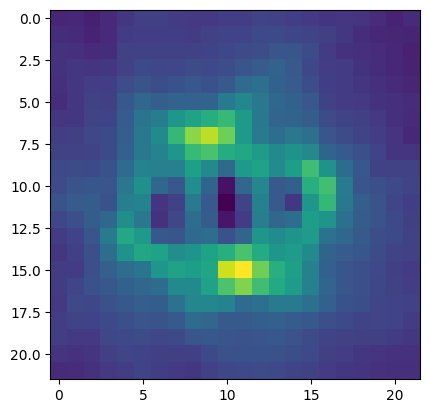

In [109]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[0,:,0])

In [112]:
arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[0,:,0].max()

np.int64(1990)

In [113]:
arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[0,:,2].max()

np.int64(2061)

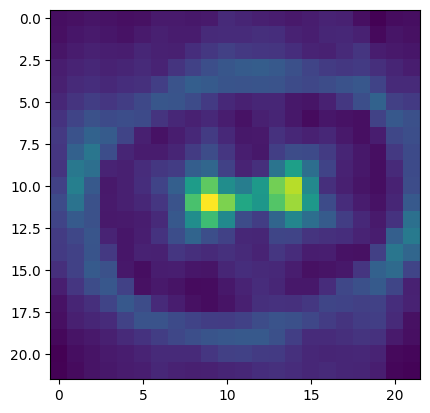

In [96]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[4,:,4])

In [98]:
arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[4,:,4].sum()

np.int64(260015)

In [99]:
arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[0,:,1].sum()

np.int64(284937)

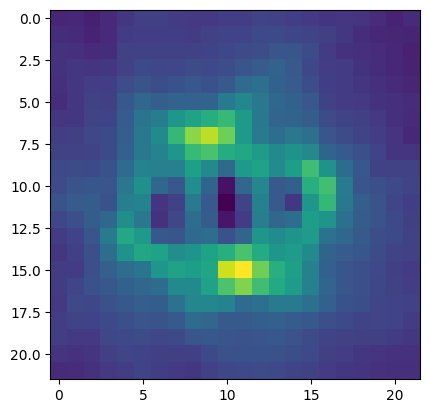

In [61]:
plt.imshow(arr.reshape((5,arr.shape[0]//5,5,arr.shape[1]//5))[0,:,0])

In [567]:
arr.shape

(120, 112)

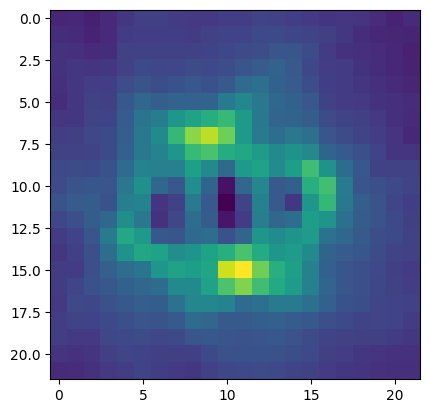

In [564]:
plt.imshow(arr[:(38),:38*10].reshape(38,10,38).sum(axis=(0,2))[:,None].T)

ValueError: cannot reshape array of size 4256 into shape (38,10,38)

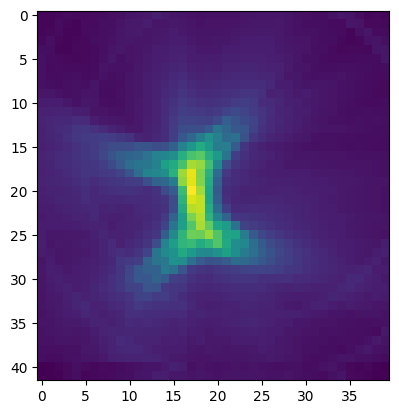

In [548]:
plt.imshow(arr[:(arr.shape[0]//5),:arr.shape[1]].reshape((42,10,-1))[:,2]) # 1134

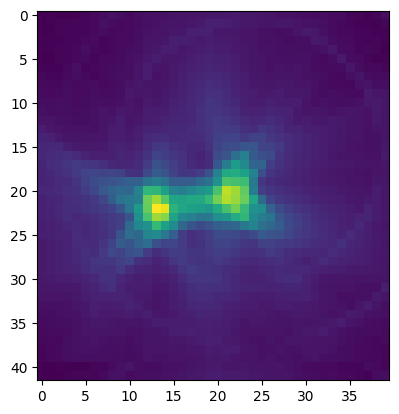

In [549]:
plt.imshow(arr[:(arr.shape[0]//5),:arr.shape[1]].reshape((42,10,-1))[:,6]) # 1154

In [533]:
arr.shape[0]//5

42

In [485]:
np.unravel_index(np.argmax(arr[:(38),:38*10]) , arr[:(38),:38*10].shape)

(np.int64(22), np.int64(245))

In [474]:
np.argmax(arr[:(38),:38*10])

np.int64(8605)

In [506]:
print(8605 % (38*10),8605 %(38))

245 17


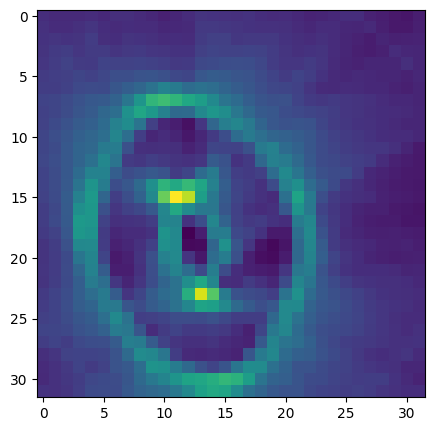

In [354]:
fig,ax = plt.subplots(figsize=(5,20))
ax.axes.imshow(arr.reshape((5,32,20,32))[0,:,0])

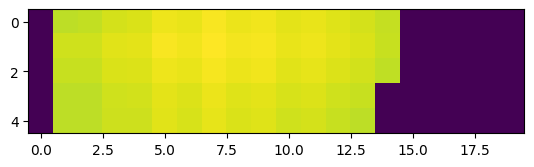

In [382]:
summedup = arr.reshape((5,32,20,32)).sum(axis=(1,3))
plt.imshow(summedup)
summedup[summedup<=summedup.mean()+1*summedup.std()] = 0
plt.imshow(summedup)

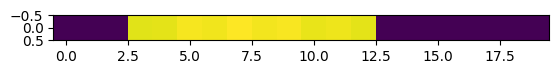

In [393]:
summedup = arr.reshape((5,32,20,32)).sum(axis=(1,3)).sum(axis=0)[:,None].T
summedup[summedup<=np.median(summedup)] = 0
plt.imshow(summedup)

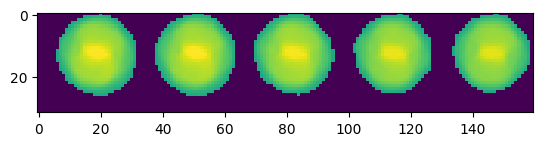

In [391]:
arr_zsums = arr.reshape((5,32,20,32)).sum(axis=(2)).reshape((-1,32)).T
arr_zsums[arr_zsums <= np.median(arr_zsums)] = 0
plt.imshow(arr_zsums)

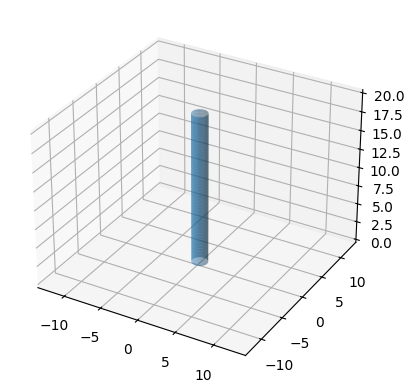

In [425]:
import numpy as np

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,1,20)

ax.plot_surface(Xc, Yc, Zc, alpha=0.5,)
ax.set_aspect('equal', adjustable='datalim')

plt.show()

In [439]:
np.stack([Xc,Yc,Zc]).shape

(50, 150)

In [ ]:
plt.plot()

ValueError: Argument Z must be 2-dimensional.

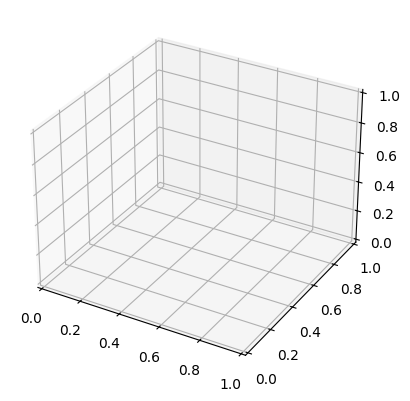

In [444]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xc.reshape(-1),Yc.reshape(-1),Zc.reshape(-1))

In [443]:
Xc.reshape(-1)

array([1.2       , 1.19179001, 1.16729486, ..., 1.16729486, 1.19179001,
       1.2       ])

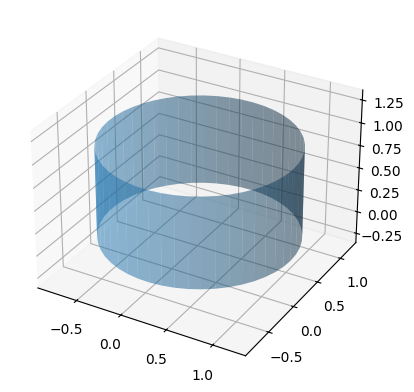

In [424]:
import numpy as np

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, 1, 2)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0.2,0.2,1,20)

ax.plot_surface(Xc, Yc, Zc, alpha=0.5,)
ax.set_aspect('equal', adjustable='datalim')

plt.show()

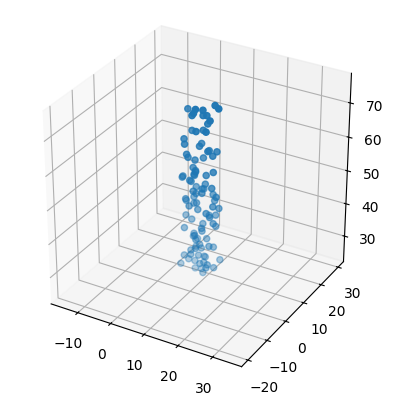

In [408]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

X = np.random.rand(100)*10+5
Y = np.random.rand(100)*5+2.5
Z = np.random.rand(100)*50+25

scat = ax.scatter(X, Y, Z)

# Create cubic bounding box to simulate equal aspect ratio
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'w')

plt.grid()
plt.show()

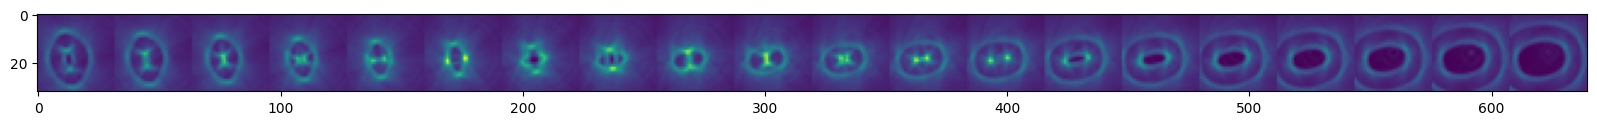

In [342]:
fig, ax = plt.subplots(figsize = (20,10))
ax.axes.imshow(arr.reshape((5,32,20,32)).sum(axis=(0)).reshape((32,-1)))

In [310]:
arr.reshape((20,-1,32,32),order='F').strides

(8, 160, 800, 25600)

In [308]:
arr.shape

(160, 640)

/tmp/ipykernel_26713/3138716411.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


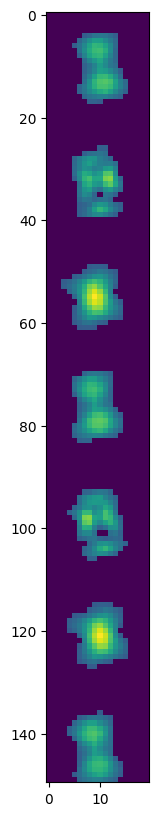

In [449]:
arr.shape

(1600, 16)

/tmp/ipykernel_26713/3915737569.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


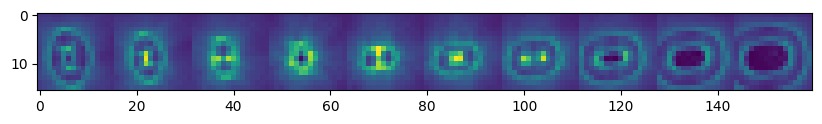

In [447]:
path = "/home/bogdanm/Projects/qmango/install/bin/exampleSum.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr)


In [353]:
plt.imshow(arr.reshape((32,20,32)).sum(axis=(0,2))[:,None].T)

ValueError: cannot reshape array of size 102400 into shape (32,20,32)

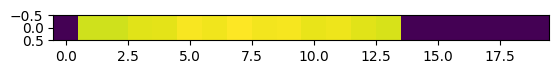

In [171]:
arr_compound = arr.reshape((32,20,32)).sum(axis=(0,2))
arr_compound[arr_compound < arr_compound.mean()] = 0
plt.imshow(arr_compound[:,None].T)

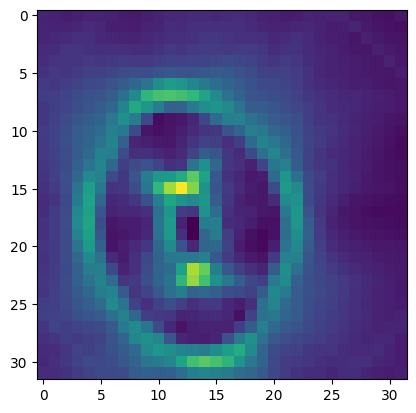

In [189]:
plt.imshow(arr.reshape((32,20,32))[:,0])

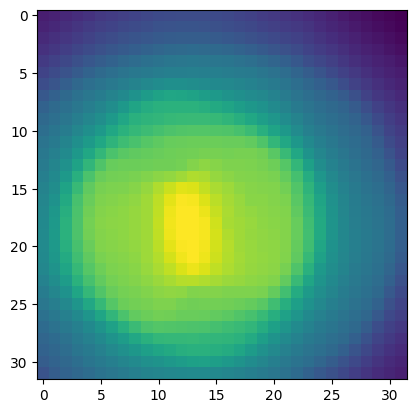

In [174]:
plt.imshow(arr.reshape((32,20,32)).sum(axis=1))

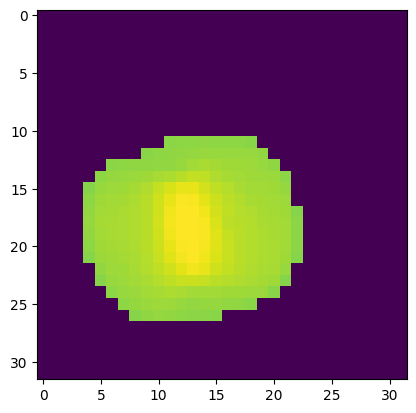

In [182]:
centreCompund = arr.reshape((32,20,32)).sum(axis=1)
centreCompund[centreCompund<(centreCompund.mean() + centreCompund.std())] = 0
plt.imshow(centreCompund)

array([ 810194,  833450,  846993,  845486,  833817,  817828,  797728,
        778575,  794738,  840912,  872328,  888595,  892682,  892765,
        890980,  881851,  862965,  839842,  815001,  792898,  773806,
        801453,  849716,  886793,  901147,  910744,  919154,  924070,
        926343,  925539,  919743,  904814,  881263,  851280,  819859,
        786460,  802485,  851583,  892487,  917093,  933438,  950730,
        966329,  974380,  977782,  977860,  974429,  970035,  956317,
        929225,  884002,  837132,  794580,  804766,  853166,  902486,
        939188,  959052,  979174,  995218, 1007179, 1013340, 1014886,
       1015908, 1014857, 1013201, 1011093, 1001641,  968352,  914316,
        854366,  792820,  796463,  851075,  913073,  962718,  986363,
        996566, 1004442, 1011430, 1018360, 1024154, 1027701, 1032919,
       1033872, 1030716, 1032621, 1033202, 1021811,  987780,  926151,
        854114,  778179,  835520,  908363,  971288, 1007764, 1015129,
       1016945, 1019

In [160]:
arr_compound.mean() + arr_compound.std()

np.float64(43314534.97919018)

In [166]:
arr_compound[arr_compound < arr_compound.mean()] = 0

In [164]:
arr_compound[arr_compound > (arr_compound.mean() + arr_compound.std())]

array([43417714])

In [141]:
np.argmax(arr.reshape((32,20,32)).sum(axis=(0,2)))

np.int64(7)

In [154]:
scale = 4
step = round(scale / 5)
# +- scale/2
# max val radius , check whether next is >= radius + 4 px, maxleft and maxright based on this rule


In [155]:
step

1

In [146]:
np.argmax(arr.reshape((32,20,32)).sum(axis=(0,2))[:7])

np.int64(5)

In [147]:
np.argmax(arr.reshape((32,20,32)).sum(axis=(0,2))[8:])

np.int64(1)

In [135]:
arr.reshape((16,10,16)).sum(axis=(0,2))[5:].max()

np.int64(21103414)

In [134]:
arr.reshape((16,10,16)).sum(axis=(0,2))[:4].max()

np.int64(21201558)

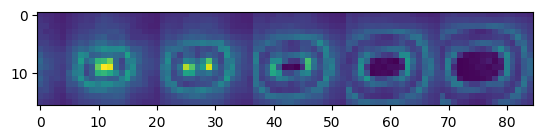

In [75]:
plt.imshow(arr[:,75:])

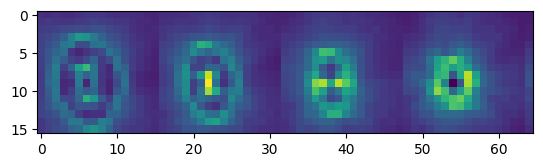

In [76]:
plt.imshow(arr[:,:65])

In [ ]:
# find next max and prev max and assess which one is bigger

In [77]:
np.argmax(arr[:,75:])

np.int64(776)

In [78]:

np.unravel_index(np.argmax(arr[:,:65]) , arr.shape)

(np.int64(3), np.int64(127))

In [61]:
np.unravel_index(np.argmax(arr) , arr.shape)

(np.int64(7), np.int64(70))

/tmp/ipykernel_26713/2959148612.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


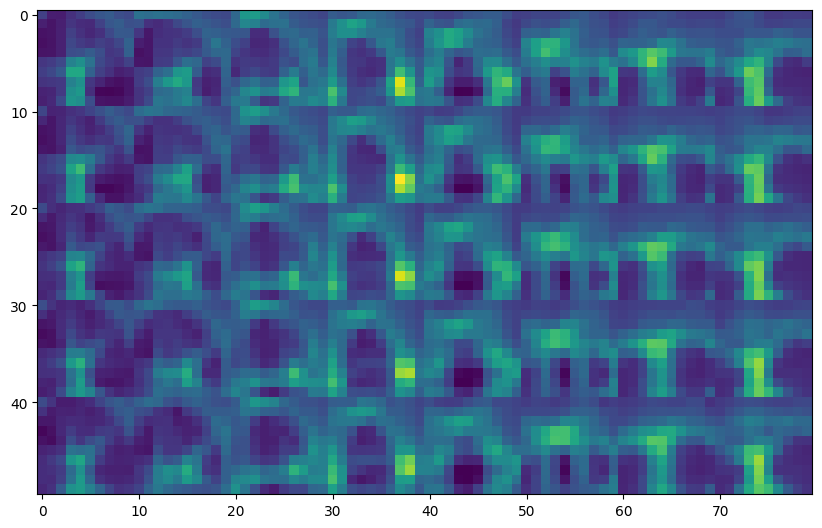

In [45]:
path = "/home/bogdanm/Projects/qmango/install/bin/example2.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr)


/tmp/ipykernel_26713/2954448073.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  arr = pd.read_csv(path,header=None,delim_whitespace=True).values


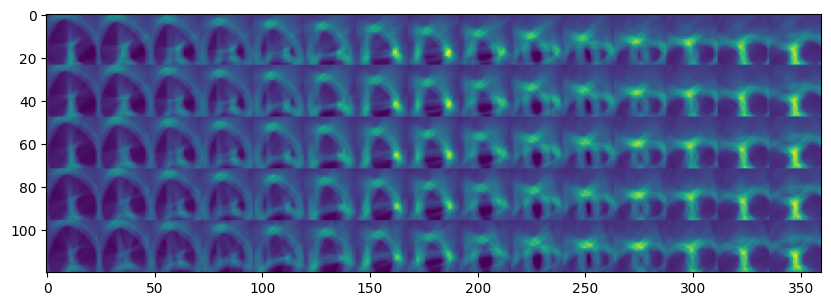

In [23]:
path = "/home/bogdanm/Projects/qmango/install/bin/example3.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(arr)

In [26]:
arr[arr < (arr.mean() + 3*arr.std())] = 0

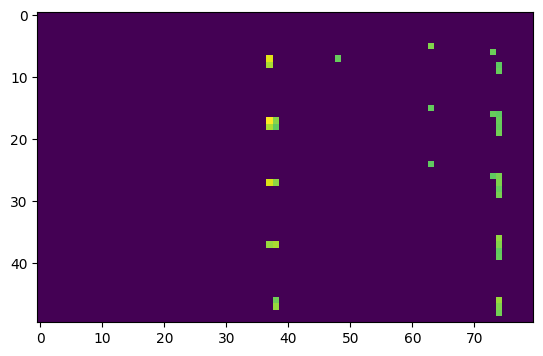

In [27]:
plt.imshow(arr)

# COULD SUM UP ALL THE ANOMALIES OVER ALL Z SLICES
# BUT THE CENTRES ARE DIFFERENT!

In [ ]:
17966 % 630 # this is x index

In [ ]:
arr

In [30]:
arr.shape

(50, 80)

In [36]:
arr_r = arr.reshape((5,10,80))

((arr_r[0] - arr_r[4])!=0).sum()

np.int64(799)

In [38]:
# if we do not overwrite the center coordinates with a const, then at least the radius selection will be more consistent?
arr_r_sum = arr_r.sum(axis=0)

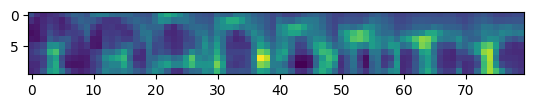

In [39]:
plt.imshow(arr_r_sum)

In [41]:
arr_r_sum[arr_r_sum<arr_r_sum.mean()+arr_r_sum.std()*3] = 0

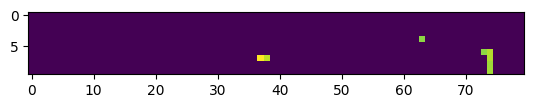

In [42]:
plt.imshow(arr_r_sum)

In [ ]:
# find maximum, find maximum left and right +- 5 pixels to radius left and right.

In [43]:
arr_r_sum.max()

np.int64(11167)

In [ ]:
path = "/home/bogdanm/Projects/qmango/install/bin/example.txt"
arr = pd.read_csv(path,header=None,delim_whitespace=True).values

fig,ax = plt.subplots(figsize=(5,10))
ax.axes.imshow(arr)


In [ ]:
arr.shape

In [ ]:
plt.plot(tomoProcessed['tomo_float'][0].data[400])

In [ ]:
630*630*100

In [ ]:
plt.plot(tomoProcessed['tomo_float'][99].data[400])

In [ ]:
tomoSubSet = nc.Dataset('/home/bogdanm/data/containerSamples/Whiting_5640_5mm_031114_preserved/tomoLoRes_SS.nc')

In [ ]:
tomoData = tomoSubSet['tomo']

In [ ]:
data = tomoData[:].data.astype(np.uint16)

In [ ]:
data.sum()

# 395351898135 is the value from the test filter. It works!!!

In [ ]:
data[20]

In [ ]:
plt.imshow(data[20])

In [ ]:
plt.imshow(data[20])

In [ ]:
array = pd.read_csv("build/example.txt",sep='\s+',header=None).values

# 128x128, scal 4

fig, ax = plt.subplots(figsize=(3,15))

ax.axes.imshow(array)

maxValCoords = np.argwhere(array == array.max())[0]
print(maxValCoords)
ax.scatter(maxValCoords[1],maxValCoords[0])

In [ ]:
array = pd.read_csv("build/example2.txt",delim_whitespace=True,header=None).values

fig, ax = plt.subplots()

ax.axes.imshow(array)

maxValCoords = np.argwhere(array == array.max())[0]
print(maxValCoords)
ax.scatter(maxValCoords[1],maxValCoords[0],color='r',marker='+')


# MaxVal: 2213; MaxValIdx: 2676
# Radius: 1210; iIdx: 19; jIdx: 20
# xAbs: 1331; yAbs: 1386
# Outputting the accumulator (Iteration I)

# Radii assessed:
# 1209.5 1209.75 1210 1210.25 1210.5 
# MaxVal: 847; MaxValIdx: 1651
# Radius: 1209.75; iIdx: 19; jIdx: 19
# xAbs: 1334; yAbs: 1389
# Outputting the accumulator (Iteration II)

In [ ]:
edges_array = pd.read_csv("build/output_edges.txt",delim_whitespace=True,header=None).values

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axes.imshow(edges_array,cmap='terrain')

In [ ]:
(edges_array!=0).sum()

In [ ]:
(edges_array!=0).sum()

In [ ]:
edges_array.mean()